# Residual Networks in Keras

In theory, very deep networks can represent very complex functions; but in practice, they are hard to train. Residual Networks, allow you to train much deeper networks than were previously practically feasible.

- Implement the basic building blocks of ResNets. 
- Put together these building blocks to implement and train a state-of-the-art neural network for image classification. 

Load the required packages.

In [20]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/SYM_TD_TPs/TD2_ResNets')


ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1 - The problem of very deep neural networks

In recent years, neural networks have become deeper, with state-of-the-art networks of over a hundred layers.

Very deep networks can represent very complex functions. However, a huge barrier to training them is vanishing gradients: very deep networks often have a gradient signal that goes to zero quickly, thus making gradient descent unbearably slow.

During training, you might see the gradient magnitude for the earlier layers descrease to zero very rapidly: 

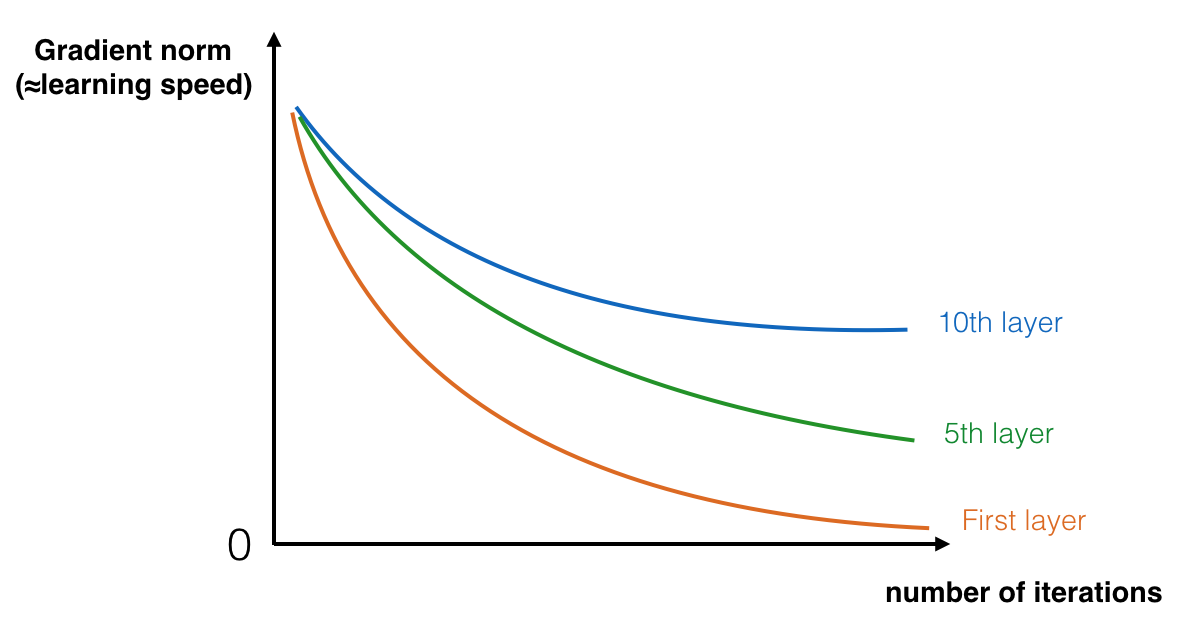

In [29]:
from IPython.display import Image
Image("images/vanishing_grad_kiank.png")

 **Figure 1** : **Vanishing gradient** The speed of learning decreases very rapidly for the early layers as the network trains </center></caption>

You are now going to solve this problem by building a Residual Network!

## 2 - Building a Residual Network

In ResNets, a "shortcut" or a "skip connection" allows the gradient to be directly backpropagated to earlier layers: 

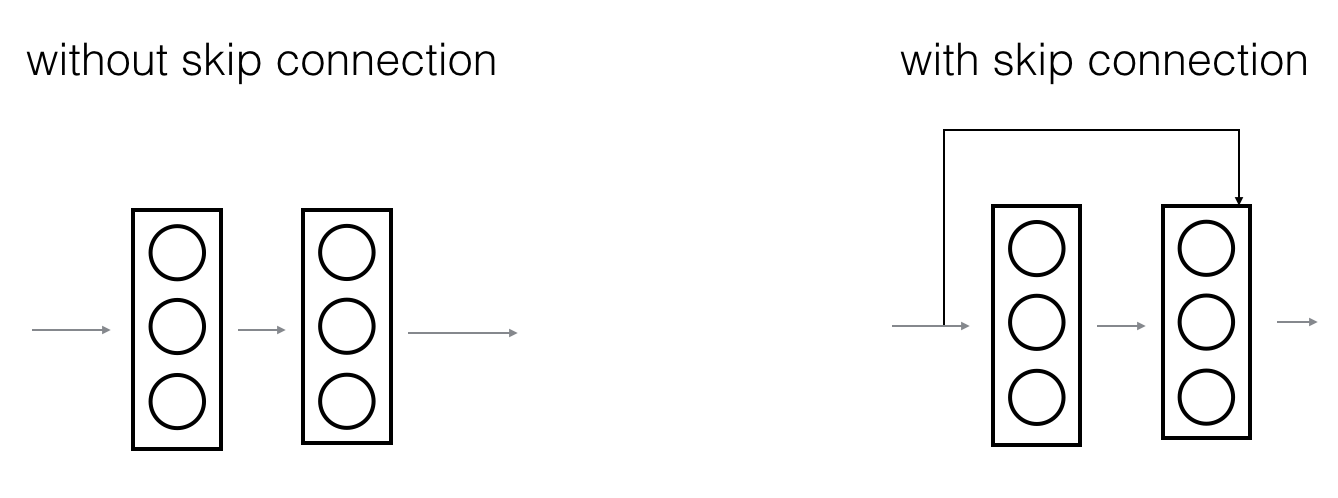

In [31]:
Image("images/skip_connection_kiank.png")

**Figure 2**: A ResNet block showing a **skip-connection** 

The image on the left shows the "main path" through the network. The image on the right adds a shortcut to the main path. By stacking these ResNet blocks on top of each other, you can form a very deep network. 

Two main types of blocks are used in a ResNet, depending mainly on whether the input/output dimensions are same or different.

### 2.1 - The identity block

The identity block is the standard block used in ResNets: input activation ($a^{[l]}$) has the same dimension as the output activation ($a^{[l+2]}$). 

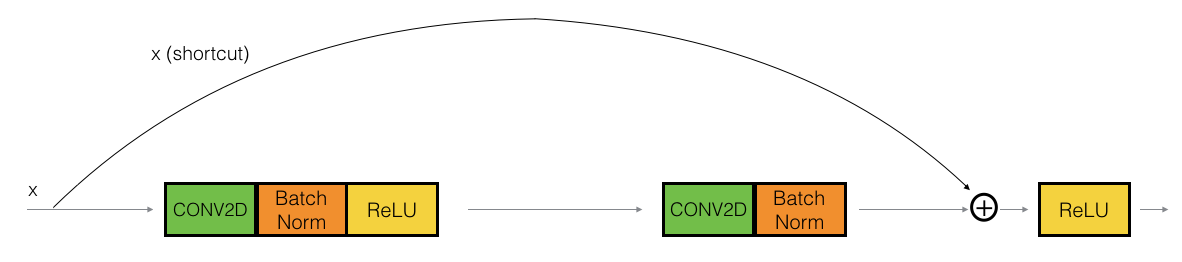

In [22]:
Image("images/idblock2_kiank.png")

**Figure 3**: **Identity block.** Skip connection "skips over" 2 layers.
    
You'll  impement a slightly more powerful version of this identity block: "skip over" 3 hidden layers rather than 2 layers: 


In [1]:
Image("images/idblock3_kiank.png",width=800)

NameError: name 'Image' is not defined

 **Figure 4** : **Identity block.** Skip connection "skips over" 3 layers.

First component of main path: 
- CONV2D has $F_1$ filters of shape (1,1) and a stride of (1,1), padding: "valid", name: `conv_name_base + '2a'`. Use 0 as the seed for the random initialization. 
- BatchNorm is normalizing the channels axis, name: `bn_name_base + '2a'`.
- ReLU activation function. 

Second component of main path:
- CONV2D has $F_2$ filters of shape $(f,f)$ and a stride of (1,1), padding: "same", name: `conv_name_base + '2b'`. Use 0 as the seed for the random initialization. 
- BatchNorm, name:`bn_name_base + '2b'`.
- ReLU activation function. 

Third component of main path:
- CONV2D has $F_3$ filters of shape (1,1) and a stride of (1,1), padding: "valid", name: `conv_name_base + '2c'`. Use 0 as the seed for the random initialization. 
- BatchNorm, name: `bn_name_base + '2c'`. Note that there is no ReLU activation function. 

Final step: 
- The shortcut and the input are added together.
- ReLU activation function.

**Exercise**: Implement the ResNet identity block. We have implemented the first component of the main path. You should implement the rest. 
- To implement the Conv2D step: [See reference](https://keras.io/layers/convolutional/#conv2d)
- To implement BatchNorm: [See reference](https://faroit.github.io/keras-docs/1.2.2/layers/normalization/) (axis: Integer, the axis that should be normalized (typically the channels axis))
- For the activation, use:  `Activation('relu')(X)`
- To add the value passed forward by the shortcut: [See reference](https://keras.io/layers/merge/#add)

In [33]:
# GRADED FUNCTION: identity_block

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###
    
    # Second component of main path (≈3 lines)
    X = ...
    X = ...
    X = ...
    
    # Third component of main path (≈2 lines)
    X = ...
    X = ...

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = ...
    X = ...
    
    ### END CODE HERE ###
    
    return X

In [7]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(1)
    A_prev = tf.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = identity_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tf.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.94822997 0.         1.1610144  2.747859   0.         1.36677   ]


**Expected Output**:

<table>
    <tr>
        <td>
            **out**
        </td>
        <td>
           [ 0.94822985  0.          1.16101444  2.747859    0.          1.36677003]
        </td>
    </tr>

</table>

## 2.2 - The convolutional block

The ResNet "convolutional block" is the other type of block (use this type of block when the input and output dimensions don't match up). There is a CONV2D layer in the shortcut path: 

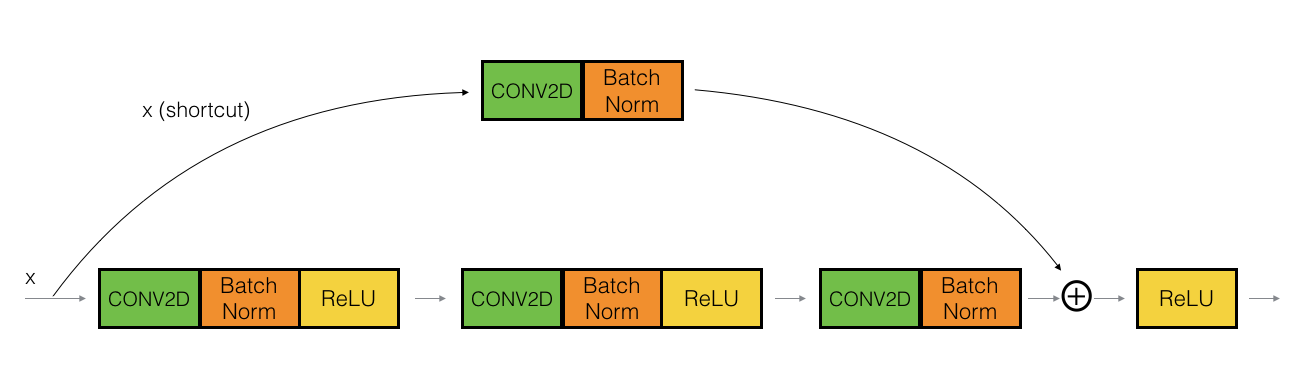

In [32]:
Image("images/convblock_kiank.png")

 **Figure 4** : **Convolutional block** 

The CONV2D layer is used to resize the input $x$ to a different dimension. For example, to reduce the activation dimensions's height and width by a factor of 2, you can use a 1x1 convolution with a stride of 2. The CONV2D layer on the shortcut path does not use any non-linear activation function.



First component of main path:
- CONV2D has $F_1$ filters of shape (1,1) and a stride of (s,s), padding: "valid", name: `conv_name_base + '2a'`. 
- BatchNorm, name: `bn_name_base + '2a'`.
- ReLU activation function.  

Second component of main path:
- CONV2D has $F_2$ filters of (f,f) and a stride of (1,1), padding: "same", name: `conv_name_base + '2b'`.
- BatchNorm is normalizing the channels axis, name: `bn_name_base + '2b'`.
- ReLU activation function. 

Third component of main path:
- CONV2D has $F_3$ filters of (1,1) and a stride of (1,1), padding: "valid", name: `conv_name_base + '2c'`.
- BatchNorm, name: `bn_name_base + '2c'`. Note that there is no ReLU activation function in this component. 

Shortcut path:
- CONV2D has $F_3$ filters of shape (1,1) and a stride of (s,s). Its padding is "valid" and its name should be `conv_name_base + '1'`.
- BatchNorm (`bn_name_base + '1'`). 

Final step: 
- The shortcut and the main path values are added together.
- ReLU activation function
    
**Exercise**: Implement the convolutional block. Always use 0 as the seed for the random initialization.
- [Conv Hint](https://keras.io/layers/convolutional/#conv2d)
- [BatchNorm Hint](https://keras.io/layers/normalization/#batchnormalization) (axis: Integer, the axis that should be normalized (typically the features axis))
- For the activation, use:  `Activation('relu')(X)`
- [Addition Hint](https://keras.io/layers/merge/#add)

In [8]:
# GRADED FUNCTION: convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    ### START CODE HERE ###

    # Second component of main path (≈3 lines)
    X = ...
    X = ...
    X = ...

    # Third component of main path (≈2 lines)
    X = ...
    X = ...

    ##### SHORTCUT PATH #### (≈2 lines)
    X = ...
    X = ...
    
    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = ...
    X = ...
    
    ### END CODE HERE ###
    
    return X

In [9]:
tf.reset_default_graph()

with tf.Session() as test:
    np.random.seed(1)
    A_prev = tf.placeholder("float", [3, 4, 4, 6])
    X = np.random.randn(3, 4, 4, 6)
    A = convolutional_block(A_prev, f = 2, filters = [2, 4, 6], stage = 1, block = 'a')
    test.run(tf.global_variables_initializer())
    out = test.run([A], feed_dict={A_prev: X, K.learning_phase(): 0})
    print("out = " + str(out[0][1][1][0]))

out = [0.09018463 1.2348979  0.46822023 0.03671762 0.         0.65516603]


**Expected Output**:

<table>
    <tr>
        <td>
            **out**
        </td>
        <td>
           [ 0.09018463  1.23489773  0.46822017  0.0367176   0.          0.65516603]
        </td>
    </tr>

</table>

## 3 - Building your first ResNet model (50 layers)

"ID BLOCK" stands for "Identity block," and "ID BLOCK x3" means you should stack 3 identity blocks together.

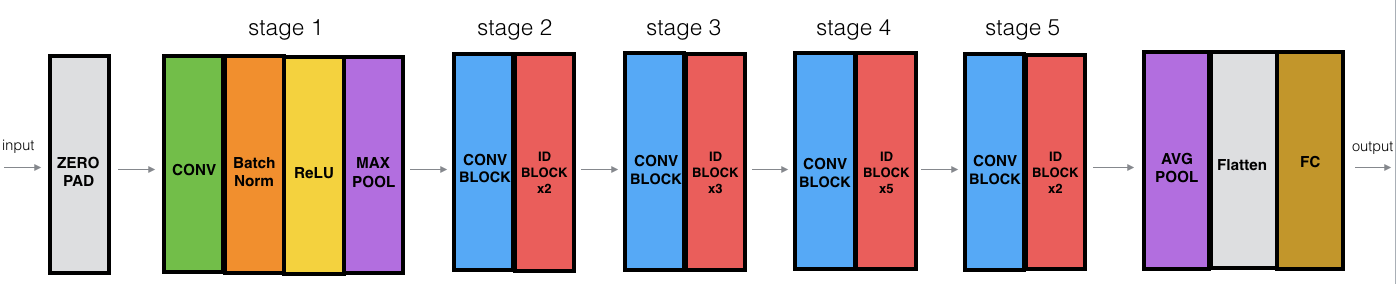

In [25]:
Image("images/resnet_kiank.png")

**Figure 5** : **ResNet-50 model**

- Zero-padding pads the input with a pad of (3,3)
- Stage 1:
    - The 2D Convolution has 64 filters of shape (7,7) and uses a stride of (2,2), name: "conv1".
    - BatchNorm is applied to the channels axis of the input.
    - MaxPooling uses a (3,3) window and a (2,2) stride.
- Stage 2:
    - The convolutional block uses three set of filters of size [64,64,256], "f" is 3, "s" is 1 and the block is "a".
    - The 2 identity blocks use three set of filters of size [64,64,256], "f" is 3 and the blocks are "b" and "c".
- Stage 3:
    - The convolutional block uses three set of filters of size [128,128,512], "f" is 3, "s" is 2 and the block is "a".
    - The 3 identity blocks use three set of filters of size [128,128,512], "f" is 3 and the blocks are "b", "c" and "d".
- Stage 4:
    - The convolutional block uses three set of filters of size [256, 256, 1024], "f" is 3, "s" is 2 and the block is "a".
    - The 5 identity blocks use three set of filters of size [256, 256, 1024], "f" is 3 and the blocks are "b", "c", "d", "e" and "f".
- Stage 5:
    - The convolutional block uses three set of filters of size [512, 512, 2048], "f" is 3, "s" is 2 and the block is "a".
    - The 2 identity blocks use three set of filters of size [256, 256, 2048], "f" is 3 and the blocks are "b" and "c".
- The 2D Average Pooling uses a window of shape (2,2) and its name is "avg_pool".
- The flatten doesn't have any hyperparameters or name.
- The Fully Connected (Dense) layer reduces its input to the number of classes using a softmax activation. Its name should be `'fc' + str(classes)`.

**Exercise**: Implement the ResNet with 50 layers described in the figure above. 

- Average pooling [see reference](https://keras.io/layers/pooling/#averagepooling2d)
- Conv2D: [See reference](https://keras.io/layers/convolutional/#conv2d)
- BatchNorm: [See reference](https://keras.io/layers/normalization/#batchnormalization) (axis: Integer, the axis that should be normalized (typically the features axis))
- Zero padding: [See reference](https://keras.io/layers/convolutional/#zeropadding2d)
- Max pooling: [See reference](https://keras.io/layers/pooling/#maxpooling2d)
- Fully conected layer: [See reference](https://keras.io/layers/core/#dense)
- Addition: [See reference](https://keras.io/layers/merge/#add)

In [10]:
# GRADED FUNCTION: ResNet50

def ResNet50(input_shape = (64, 64, 3), classes = 6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3 (≈4 lines)
    X = ...
    X = ...
    X = ...
    X = ...

    # Stage 4 (≈6 lines)
    X = ...
    X = ... 
    X = ...
    X = ... 
    X = ...
    X = ...
    
    # Stage 5 (≈3 lines)
    X = ...
    X = ... 
    X = ...
    
    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = ...
    
    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

Run the following code to build the model's graph. If your implementation is not correct you will know it by checking your accuracy when running `model.fit(...)` below.

In [11]:
model = ResNet50(input_shape = (64, 64, 3), classes = 6)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Let's load the SIGNS Dataset.

In [ ]:
Image("images/signs_data_kiank.png")


<img src="images/signs_data_kiank.png" style="width:450px;height:250px;">
<caption><center> <u> <font color='purple'> **Figure 6** </u><font color='purple'>  : **SIGNS dataset** </center></caption>


In [12]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [13]:
model.fit(X_train, Y_train, epochs = ..., batch_size = 32)

Epoch 1/3
1080/1080 [==============================] - 64s 59ms/step - loss: 3.0697 - acc: 0.2648
Epoch 2/3
1080/1080 [==============================] - 59s 55ms/step - loss: 2.1823 - acc: 0.3509
Epoch 3/3
1080/1080 [==============================] - 59s 55ms/step - loss: 1.6093 - acc: 0.4806


**Expected Output**:

<table>
    <tr>
        <td>
            ** Epoch 1/**
        </td>
        <td>
           loss: between 1 and 5, acc: between 0.2 and 0.5.
        </td>
    </tr>
    <tr>
        <td>
            ** Epoch 2/**
        </td>
        <td>
           loss: between 1 and 5, acc: between 0.2 and 0.5.
        </td>
    </tr>

</table>

In [18]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

120/120 [==============================] - 1s 6ms/step
Loss = 13.353280194600423
Test Accuracy = 0.16666666716337203


We get a lot better performance when we train for ~20 epochs, but this will take more than an hour when training on a CPU. 

Using a GPU, we've trained our own ResNet50 model's weights on the SIGNS dataset. You can load and run our trained model on the test set in the cells below. It may take ≈1min to load the model.

In [3]:
model = load_model('ResNet50.h5') 

ValueError: Cannot create group in read only mode.

In [15]:
preds = model.evaluate(X_test, Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

120/120 [==============================] - 1s 5ms/step
Loss = 1.4359750986099242
Test Accuracy = 0.6416666626930236


ResNet50 is a powerful model for image classification when it is trained for an adequate number of iterations. 


## 4 - Test on your own image

    1. Add your image to the "images" folder
    2. Run the code and check if the algorithm is right! 

Input image shape: (1, 64, 64, 3)
class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 
[[ 1.  0.  0.  0.  0.  0.]]


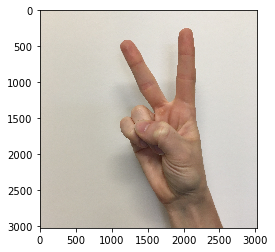

In [34]:
img_path = 'images/my_image.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = scipy.misc.imread(img_path)
imshow(my_image)
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
print(model.predict(x))

You can also print a summary of your model by running the following code.

In [35]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 64, 64, 3)     0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 70, 70, 3)     0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 32, 32, 64)    9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 32, 32, 64)    256         conv1[0][0]                      
___________________________________________________________________________________________

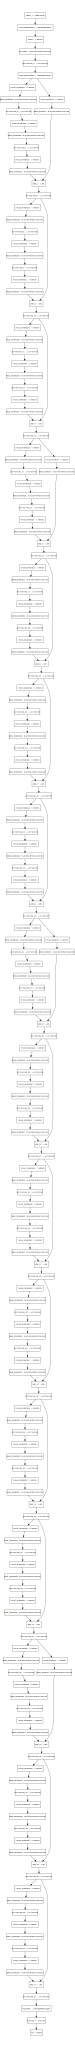

In [36]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))